# Real-Time Sign Language Translator - Setup & Environment Verification

This notebook verifies the environment setup for the Real-Time Sign Language Translator project using PyTorch and CUDA.

**Objectives:**
- Verify CUDA installation
- Check PyTorch GPU availability
- Install required dependencies
- Test GPU operations
- Verify webcam access
- Set up project structure
- Configure model parameters

## 1. Verify CUDA Installation

First, let's check if CUDA is properly installed on the system.

In [1]:
!nvidia-smi

Mon Dec 22 21:19:44 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 577.03                 Driver Version: 577.03         CUDA Version: 12.9     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce MX450         WDDM  |   00000000:01:00.0 Off |                  N/A |
| N/A   53C    P3            N/A  /   12W |       0MiB /   2048MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

## 2. Import PyTorch and Check GPU Availability

Import PyTorch and verify CUDA configuration.

In [2]:
import torch
import sys
import platform

print("="*50)
print("System Information")
print("="*50)
print(f"Python Version: {sys.version}")
print(f"Platform: {platform.platform()}")
print(f"PyTorch Version: {torch.__version__}")
print(f"CUDA Available: {torch.cuda.is_available()}")

if torch.cuda.is_available():
    print(f"CUDA Version: {torch.version.cuda}")
    print(f"Number of GPUs: {torch.cuda.device_count()}")
    print(f"Current GPU: {torch.cuda.current_device()}")
    print(f"GPU Name: {torch.cuda.get_device_name(0)}")
    print(f"GPU Memory: {torch.cuda.get_device_properties(0).total_memory / 1e9:.2f} GB")
else:
    print("WARNING: CUDA is not available. Training will be slow!")
print("="*50)

System Information
Python Version: 3.13.7 (tags/v3.13.7:bcee1c3, Aug 14 2025, 14:15:11) [MSC v.1944 64 bit (AMD64)]
Platform: Windows-11-10.0.26200-SP0
PyTorch Version: 2.7.1+cu118
CUDA Available: True
CUDA Version: 11.8
Number of GPUs: 1
Current GPU: 0
GPU Name: NVIDIA GeForce MX450
GPU Memory: 2.15 GB


## 3. Install Required Dependencies

Install essential libraries for computer vision, data processing, and visualization.

In [3]:
!pip install opencv-python opencv-contrib-python numpy matplotlib seaborn scikit-learn torchvision torchaudio pillow pandas tqdm

INFO: pip is looking at multiple versions of torchaudio to determine which version is compatible with other requirements. This could take a while.
   ---------------------------------------- 0.0/45.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/45.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/45.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/45.3 MB ? eta -:--:--
   ---------------------------------------- 0.3/45.3 MB ? eta -:--:--
   ---------------------------------------- 0.3/45.3 MB ? eta -:--:--
   ---------------------------------------- 0.3/45.3 MB ? eta -:--:--
   ---------------------------------------- 0.5/45.3 MB 382.3 kB/s eta 0:01:58
   ---------------------------------------- 0.5/45.3 MB 382.3 kB/s eta 0:01:58
    --------------------------------------- 0.8/45.3 MB 417.9 kB/s eta 0:01:47
    --------------------------------------- 0.8/45.3 MB 417.9 kB/s eta 0:01:47
    --------------------------------------- 0.8

## 4. Import Required Libraries

Import all necessary libraries for the project.

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from PIL import Image
import torchvision
from torchvision import transforms
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from tqdm import tqdm
import os
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)

print("✓ All libraries imported successfully!")

✓ All libraries imported successfully!


## 5. Test PyTorch CUDA Operations

Perform basic GPU operations to ensure CUDA is working correctly with PyTorch.

In [5]:
# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Create random tensors
print("\nTesting GPU Operations...")
a = torch.randn(1000, 1000).to(device)
b = torch.randn(1000, 1000).to(device)

# Perform matrix multiplication
import time
start = time.time()
c = torch.matmul(a, b)
torch.cuda.synchronize() if torch.cuda.is_available() else None
end = time.time()

print(f"Matrix multiplication (1000x1000) completed in: {(end-start)*1000:.2f} ms")
print(f"Result tensor shape: {c.shape}")
print(f"Result tensor device: {c.device}")
print("\n✓ GPU operations working correctly!")

Using device: cuda

Testing GPU Operations...
Matrix multiplication (1000x1000) completed in: 160.03 ms
Result tensor shape: torch.Size([1000, 1000])
Result tensor device: cuda:0

✓ GPU operations working correctly!


## 6. Verify Webcam Access

Test webcam access for real-time video capture (important for sign language detection).

Testing webcam access...
OpenCV Version: 4.12.0
✓ Webcam is accessible!
Webcam Resolution: 640x480
FPS: 30
Test frame captured successfully! Shape: (480, 640, 3)


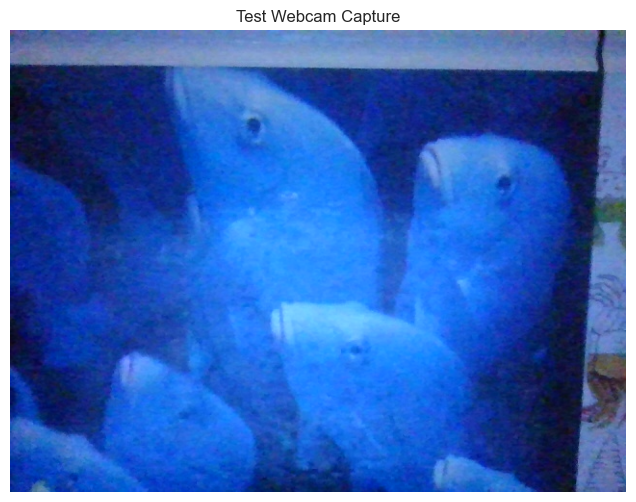

In [7]:
print("Testing webcam access...")
print("OpenCV Version:", cv2.__version__)

# Try to access webcam
cap = cv2.VideoCapture(0)

if cap.isOpened():
    print("✓ Webcam is accessible!")
    
    # Get webcam properties
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = int(cap.get(cv2.CAP_PROP_FPS))
    
    print(f"Webcam Resolution: {width}x{height}")
    print(f"FPS: {fps}")
    
    # Capture a test frame
    ret, frame = cap.read()
    if ret:
        print(f"Test frame captured successfully! Shape: {frame.shape}")
        
        # Display the frame
        plt.figure(figsize=(10, 6))
        plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
        plt.title("Test Webcam Capture")
        plt.axis('off')
        plt.show()
    
    cap.release()
else:
    print("✗ WARNING: Cannot access webcam. Please check your camera connection.")
    print("Note: For real-time translation, webcam access is required.")

## 7. Verify Project Directory Structure

Ensure all necessary directories exist for the project.

In [8]:
# Define project directories
project_root = os.path.abspath('..')
directories = [
    'data/raw',
    'data/processed',
    'models/saved_models',
    'models/checkpoints',
    'outputs/logs',
    'outputs/metrics',
    'outputs/visualizations',
    'src'
]

print("Verifying project directory structure...")
print(f"Project Root: {project_root}\n")

for directory in directories:
    dir_path = os.path.join(project_root, directory)
    if os.path.exists(dir_path):
        print(f"✓ {directory}")
    else:
        os.makedirs(dir_path, exist_ok=True)
        print(f"✓ {directory} (created)")

print("\n✓ All directories are ready!")

Verifying project directory structure...
Project Root: d:\Projects\RealTime-Sign-Language-Translator

✓ data/raw
✓ data/processed
✓ models/saved_models
✓ models/checkpoints (created)
✓ outputs/logs
✓ outputs/metrics
✓ outputs/visualizations
✓ src

✓ All directories are ready!


## 8. Configure Model Parameters and Hyperparameters

Define configuration settings for the sign language translation model.

In [9]:
# Model Configuration
config = {
    # Data parameters
    'img_size': 224,
    'sequence_length': 30,  # Number of frames for each sign
    'batch_size': 32,
    'num_workers': 4,
    
    # Model parameters
    'num_classes': 26,  # A-Z sign language alphabet (can be extended)
    'hidden_size': 512,
    'num_layers': 2,
    'dropout': 0.5,
    
    # Training parameters
    'learning_rate': 0.001,
    'num_epochs': 50,
    'early_stopping_patience': 10,
    
    # Device
    'device': device,
    
    # Paths
    'data_path': os.path.join(project_root, 'data'),
    'model_path': os.path.join(project_root, 'models', 'saved_models'),
    'checkpoint_path': os.path.join(project_root, 'models', 'checkpoints'),
    'output_path': os.path.join(project_root, 'outputs')
}

# Display configuration
print("="*50)
print("Model Configuration")
print("="*50)
for key, value in config.items():
    print(f"{key:30s}: {value}")
print("="*50)

# Save configuration
import json
config_save = {k: str(v) for k, v in config.items()}
config_file = os.path.join(project_root, 'config.json')
with open(config_file, 'w') as f:
    json.dump(config_save, f, indent=4)
    
print(f"\n✓ Configuration saved to: {config_file}")

Model Configuration
img_size                      : 224
sequence_length               : 30
batch_size                    : 32
num_workers                   : 4
num_classes                   : 26
hidden_size                   : 512
num_layers                    : 2
dropout                       : 0.5
learning_rate                 : 0.001
num_epochs                    : 50
early_stopping_patience       : 10
device                        : cuda
data_path                     : d:\Projects\RealTime-Sign-Language-Translator\data
model_path                    : d:\Projects\RealTime-Sign-Language-Translator\models\saved_models
checkpoint_path               : d:\Projects\RealTime-Sign-Language-Translator\models\checkpoints
output_path                   : d:\Projects\RealTime-Sign-Language-Translator\outputs

✓ Configuration saved to: d:\Projects\RealTime-Sign-Language-Translator\config.json


## 9. Summary

Environment setup complete! All components verified and ready for development.

In [10]:
print("="*60)
print("SETUP COMPLETE - Environment Ready!")
print("="*60)
print("\n✓ CUDA and GPU verified")
print("✓ PyTorch configured")
print("✓ Dependencies installed")
print("✓ Webcam access tested")
print("✓ Project directories created")
print("✓ Configuration saved")
print("\n" + "="*60)
print("Next Steps:")
print("="*60)
print("1. Collect or download sign language dataset")
print("2. Data preprocessing and augmentation")
print("3. Build CNN-LSTM model architecture")
print("4. Train the model")
print("5. Implement real-time detection")
print("="*60)

SETUP COMPLETE - Environment Ready!

✓ CUDA and GPU verified
✓ PyTorch configured
✓ Dependencies installed
✓ Webcam access tested
✓ Project directories created
✓ Configuration saved

Next Steps:
1. Collect or download sign language dataset
2. Data preprocessing and augmentation
3. Build CNN-LSTM model architecture
4. Train the model
5. Implement real-time detection
